# Object Detection for Airtime Scratchcard Digits

## Introduction
Hello everyone! In this project, I will focus on the task of converting Safaricom and Telkom scratchcard airtime images into digits that can be used to load airtime. In the past, there was an app called "RechargeKing" that allowed users to load airtime by capturing images of scratchcards. However, recent changes in the fonts of Safaricom and Telkom scratch cards have rendered the app obsolete as the developers did not update it.

## Problem Definition
The problem I aim to solve is the digit recognition from scratchcard images. I want to create a solution that can automatically extract the airtime digits from these images, allowing users to easily load airtime without manual input.

## Solution
To tackle this problem, I will leverage Nicholas Renotte's TensorFlow Object Detection course, which provides a comprehensive guide on using TensorFlow for object detection. This course will serve as my foundation to build an object detection model capable of recognizing and extracting the digits from scratchcard images. I will use Python for coding and follow the principles outlined in the course.

Let's get started!


# Steps to Achieve Object Detection

1. **Install and Setup**: We'll start by setting up our development environment and installing the necessary libraries, including TensorFlow.

2. **Collect Images and Label**: Next, we'll gather a dataset of images that contains the objects we want to detect. We'll also label these objects to train our model effectively.

3. **Training Models**: The heart of object detection is training models. I'll explain how to use pre-trained models or train custom ones to identify objects in images.

4. **Detecting Objects**: Once our models are trained, we'll apply them to real-world images to detect and locate objects accurately.

5. **Freezing and Conversion**: We'll discuss how to freeze and convert our trained model into a format suitable for deployment.

6. **Performance Tuning**: Object detection isn't just about accuracy; it's also about performance. We'll optimize our models for speed and efficiency.

7. **Packaging**: Finally, I'll guide you on packaging your object detection solution for practical use.



I plan on doing most of the work here then the heavy lifting will be done on collab


# 1. **Install and Setup**


In [ ]:
# # create venv environment 
# !python -m venv tfod

# # activate tfod env 
# !source tfod/bin/activate

In [ ]:
# # upgrade pip
# !python -m pip install --upgrade pip

# # install ipykernel
# !pip install ipykernel

# # assosiate ipykernel to tfod env where name is the name of your virtual environment
# !python -m ipykernel install --user --name=tfod

: 


# 2. **Collect Images and Label**


We will be using a number of scratchcard pictures(already used) and label them. right now i have about 50 so they should suffice


In [4]:
# install opencv
!pip install opencv-python

In [2]:
# import opencv 
import cv2

# import uuid 
import uuid

# import os 
import os

the IMAGES_PATH will host our images and corresponding labels

In [11]:
# make a folder for images
IMAGES_PATH =  os.path.join('tensorflow','workspace','images', 'collectedimages')

if not os.path.exists(IMAGES_PATH):
    if os.name == 'posix':
        !mkdir -p {IMAGES_PATH}
    if os.name == 'nt':
        !mkdir {IMAGES_PATH}

I used 40 images of scratch cards for labeling.


## 2.1 Label images using [labelImg](https://github.com/HumanSignal/labelImg)

install pyqt5 for labelimg gui rendering and lxml for handling xml templates

In [ ]:
# install pyqt5 lxml 
!pip install --upgrade pyqt5 lxml

In [2]:
# create a folder where the labelimg repo will be clones into 
LABELIMG_PATH = os.path.join('tensorflow', 'labelimg')


In [ ]:

# clone the git repo into the new folder about 200MB
if not os.path.exists(LABELIMG_PATH):
    !mkdir {LABELIMG_PATH}
    !git clone https://github.com/HumanSignal/labelImg.git {LABELIMG_PATH}

In [8]:
# get into the folder and run the command shown 
if os.name == 'posix':
    !cd {LABELIMG_PATH} && make qt5py3
if os.name == 'nt':
    !cd {LABELIMG_PATH} && pyrcc5 -o libs/resources.py resources.qrc



In [5]:
# open the app 
!cd {LABELIMG_PATH} && python labelImg.py

Image:C:\Users\BM\tensorflow-object-detection\tensorflow\workspace\images\collectedimages\IMG_20231009_203326.jpg -> Annotation:C:/Users/BM/tensorflow-object-detection/tensorflow/workspace/images/collectedimages\IMG_20231009_203326.xml
Image:C:\Users\BM\tensorflow-object-detection\tensorflow\workspace\images\collectedimages\IMG_20231009_203333.jpg -> Annotation:C:/Users/BM/tensorflow-object-detection/tensorflow/workspace/images/collectedimages\IMG_20231009_203333.xml
Image:C:\Users\BM\tensorflow-object-detection\tensorflow\workspace\images\collectedimages\IMG_20231009_203340.jpg -> Annotation:C:/Users/BM/tensorflow-object-detection/tensorflow/workspace/images/collectedimages\IMG_20231009_203340.xml
Image:C:\Users\BM\tensorflow-object-detection\tensorflow\workspace\images\collectedimages\IMG_20231009_203347.jpg -> Annotation:C:/Users/BM/tensorflow-object-detection/tensorflow/workspace/images/collectedimages\IMG_20231009_203347.xml
Image:C:\Users\BM\tensorflow-object-detection\tensorflow

2023-10-10T19:47:55.777ZE [7376:ShellIpcClient] shell_ipc_client.cc:138:Connect Can't connect to socket at: \\.\Pipe\GoogleDriveFSPipe_BM_shell
2023-10-10T19:47:55.812ZE [7376:ShellIpcClient] shell_ipc_client.cc:621:operator() Failed to connect to the server: NOT_FOUND: Can't connect to socket at: \\.\Pipe\GoogleDriveFSPipe_BM_shell [type.googleapis.com/drive.ds.Status='UNAVAILABLE_RESOURCE']
=== Source Location Trace: ===
apps/drive/fs/ipc/shell_ipc_client.cc:139

2023-10-10T19:47:55.812ZE [16936:ShellIpcClient] shell_ipc_client.cc:138:Connect Can't connect to socket at: \\.\Pipe\GoogleDriveFSPipe_BM_shell
2023-10-10T19:47:55.812ZE [16936:ShellIpcClient] shell_ipc_client.cc:621:operator() Failed to connect to the server: NOT_FOUND: Can't connect to socket at: \\.\Pipe\GoogleDriveFSPipe_BM_shell [type.googleapis.com/drive.ds.Status='UNAVAILABLE_RESOURCE']
=== Source Location Trace: ===
apps/drive/fs/ipc/shell_ipc_client.cc:139

2023-10-10T19:47:55.812ZE [7672:ShellIpcClient] shell_ipc_

typical labeling

![Screenshot 2023-10-10 230307.png](<attachment:Screenshot 2023-10-10 230307.png>)
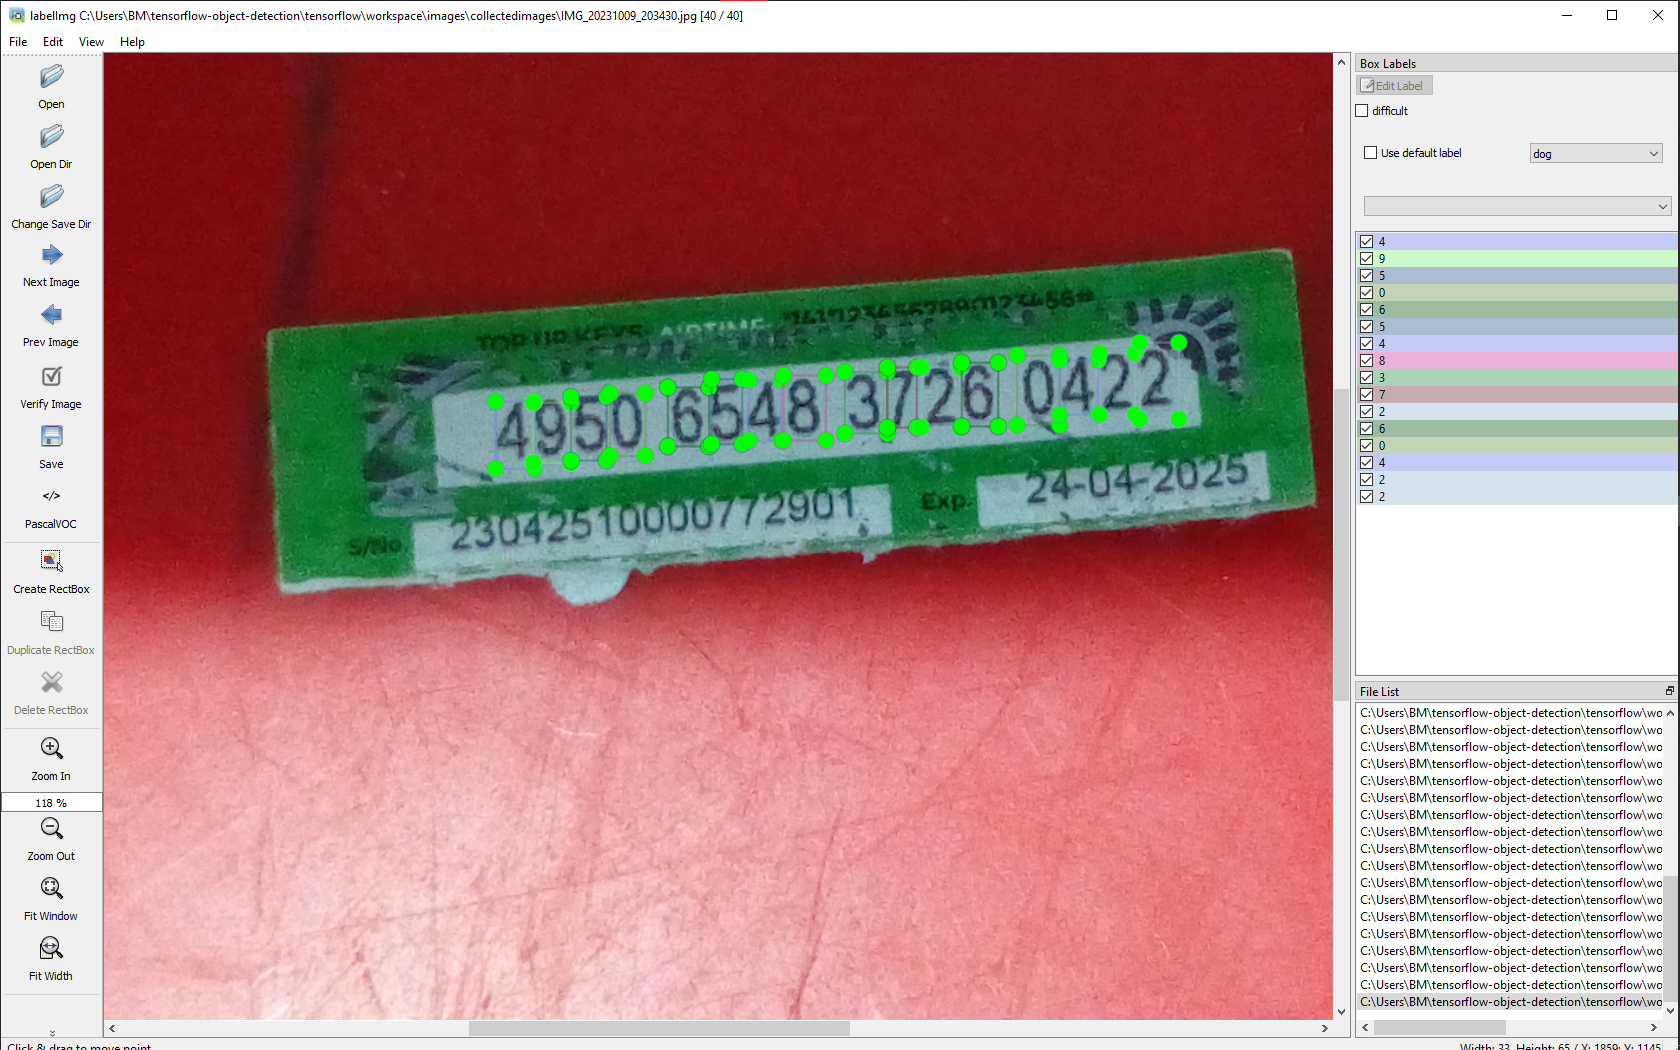

## **2.2 move them into a training and testing partition**

cretate two folders under images. one for training and one for testing.
we will split them 80/20 where we have 32 images for training and 8 images for testing


In [3]:
TRAINING_PATH = os.path.join('tensorflow', 'workspace','images', 'train')
TESTING_PATH = os.path.join('tensorflow', 'workspace','images', 'test')

In [4]:
if not os.path.exists(TRAINING_PATH) or not os.path.exists(TESTING_PATH):
    if os.name == 'posix':
        !mkdir -p {TRAINING_PATH}
        !mkdir -p {TESTING_PATH}
    if os.name == 'nt':
        !mkdir {TRAINING_PATH}
        !mkdir {TESTING_PATH}

copy-paste images plus respective annotations to train and test folders


# 3. **Training Models**


### **Training**
In order to leverage a custom TFOD model, we need to finetune /train a new computer vision model

### **Evaluation**
Once you have trained a model, ideally you want to take a look at how well it's performing. we normally take a look at:

Precision: TP/(TP+FP)
*what propotion of my detections were correct?*

Recall: TP/ (TP+FN)
*what propotion of the actual objects did I capture?*

Loss: 
*How well is the model performing against the data provided?*

# TensorFlow Model Zoo: Making Model Choices

Within the TensorFlow Model Zoo, you'll find a diverse array of models at your disposal, each designed for specific tasks. However, when making your selection, it's crucial to understand the trade-off that often comes into play.

In the realm of object detection and beyond, the rule of thumb is simple:

- Opting for faster detections often means sacrificing some degree of accuracy.
- On the flip side, if you prioritize higher accuracy, be prepared for slightly slower detection times.

Balancing these factors is key to choosing the right model for your particular use case. In the following sections, we'll delve deeper into the considerations that guide your model selection within the TensorFlow Model Zoo.


Current choices for this project:

1. **SSD MobileNet V2 FPNLite 640x640**:
   - Speed: Relatively fast due to MobileNet architecture.
   - Accuracy: 28.2 mAP (mean Average Precision), which is moderate.
   - Resolution: 640x640.
   - Suitable for scenarios where speed is more critical than very high accuracy.

2. **SSD ResNet50 V1 FPN 640x640 (RetinaNet50)**:
   - Speed: Moderate speed due to ResNet50 backbone.
   - Accuracy: 34.3 mAP, which is relatively good.
   - Resolution: 640x640.
   - A balanced choice for accuracy and speed.

3. **SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)**:
   - Speed: Slower than the 640x640 version.
   - Accuracy: 38.3 mAP, which is better.
   - Higher resolution (1024x1024) can provide better accuracy but at the cost of speed.
   - Choose this if you need higher accuracy and have the hardware to support it.

4. **SSD ResNet101 V1 FPN 640x640 (RetinaNet101)**:
   - Speed: Similar to ResNet50.
   - Accuracy: 35.6 mAP, which is quite good.
   - Resolution: 640x640.
   - Offers a good balance of speed and accuracy, similar to the RetinaNet50 models.

5. **SSD ResNet101 V1 FPN 1024x1024 (RetinaNet101)**:
   - Speed: Slower than the 640x640 version.
   - Accuracy: 39.5 mAP, which is the highest among the models listed.
   - Resolution: 1024x1024.
   - Opt for this if you require the highest accuracy and have the necessary hardware capabilities.

When choosing an object detection model, there are several critical factors to consider:

1. **Deployment Platform**: Think about where you intend to deploy this model. Will it run on a computer, a smartphone, a Raspberry Pi, or a different device? The hardware resources available on the deployment platform will impact your choice.

2. **Frame Processing Time**: Consider the time you're willing to allocate for processing each frame. Depending on your use case, you may require real-time or near-real-time processing. Faster models can be essential for applications where speed is of the essence.

3. **Accuracy Requirements**: Evaluate how accurate your model needs to be. In some cases, high accuracy is crucial, while in others, a slightly lower accuracy may be acceptable if it allows for faster processing.

Taking these factors into account, if you prioritize faster processing and your deployment platform has limited resources, `SSD MobileNet V2 FPNLite 640x640` could be an excellent choice. It strikes a balance between speed and accuracy, making it suitable for scenarios where real-time or near-real-time processing is desired.



## 3.1 **Setup paths**

In [2]:
import os

we are going to download `SSD MobileNet V2 FPNLite 640x640` and place it in our folder. this arrangement will be useful in collab.

In [1]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet'
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [4]:
paths = {
    'WORKSPACE_PATH': os.path.join('tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('tensorflow', 'scripts'),
    'APIMODEL_PATH': os.path.join('tensorflow', 'models'),
    'ANNOTATION_PATH': os.path.join('tensorflow', 'workspace', 'annotations'),
    'IMAGES_PATH': os.path.join('tensorflow', 'workspace', 'images'),
    'MODEL_PATH': os.path.join('tensorflow', 'workspace', 'models'),
    'PRETRAINED_MODEL_PATH': os.path.join('tensorflow', 'workspace', 'pretrained_models'),
    'CHECKPOINT_PATH': os.path.join('tensorflow', 'workspace','models', CUSTOM_MODEL_NAME),
    'OUTPUT_PATH': os.path.join('tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'export'),
    'TFJS_PATH': os.path.join('tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'tfjsexport'),
    'TFLITE_PATH': os.path.join('tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'tfliteexport'),
    'PROTOC_PATH': os.path.join('tensorflow', 'workspace')
}



In [6]:
files = {
    'PIPELINE_CONFIG': os.path.join('tensorflow', 'workspace', 'models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME),
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

## 3.2 **Download TF Models Pretrained Models from TensorFlow Model Zoo and Install TFOD.**

In [ ]:
# https://github.com/tensorflow/models/tree/master

In [7]:
# install wget
if os.name=='nt':
    !pip install wget
    import wget

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=338c5fa613df70f42f5becd57afc150c270d1a2f832b0b99facc21619242ec8c
  Stored in directory: c:\users\bm\appdata\local\pip\cache\wheels\8b\f1\7f\5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
# clone the tfod garden into APIMODE_PATH
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models/tree/master {paths['APIMODEL_PATH']}

In [8]:
# install tensorflow object detection
if os.name=='posix':
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 

if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
creating build
creating build\lib
creating build\lib\object_detection
copying object_detection\eval_util.py -> build\lib\object_detection
copying object_detection\eval_util_test.py -> build\lib\object_detection
copying object_detection\exporter.py -> build\lib\object_detection
copying object_detection\exporter_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\exporter_lib_v2.py -> build\lib\object_detection
copying object_detection\exporter_main_v2.py -> build\lib\object_detection
copying object_detection\exporter_tf1_test.py -> build\lib\object_detection
copying object_detection\export_inference_graph.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_lib_tf2_test.py -> build\lib\object_detection
copying object_detection\export_tflite_graph_tf2.py -> build\lib\object_detec

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-310: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-310: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-310: module MAY be using inspect.stack
No local packages or working download links found for tensorflow_io
error: Could not find suitable distribution for Requirement.parse('tensorflow_io')


Obtaining file:///C:/Users/BM/tensorflow-object-detection/tensorflow/models/research/slim

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires lvis, which is not installed.
object-detection 0.1 requires matplotlib, which is not installed.
object-detection 0.1 requires pandas, which is not installed.
object-detection 0.1 requires pillow, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
object-detection 0.1 requires scipy, which is not installed.
object-detection 0.1 requires tensorflow_io, which is not installed.
object-detection 0.1 requires tf-models-official>=2.5.1, which is not installed.



  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/352.1 kB ? eta -:--:--
     - -------------------------------------- 10.2/352.1 kB ? eta -:--:--
     - -------------------------------------- 10.2/352.1 kB ? eta -:--:--
     ---- -------------------------------- 41.0/352.1 kB 281.8 kB/s eta 0:00:02
     ---- -------------------------------- 41.0/352.1 kB 281.8 kB/s eta 0:00:02
     ------ ------------------------------ 61.4/352.1 kB 297.7 kB/s eta 0:00:01
     ------- -----------------------------

In [9]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')

# verify Installation
!python {VERIFICATION_SCRIPT}

Traceback (most recent call last):
  File "c:\Users\BM\tensorflow-object-detection\tensorflow\models\research\object_detection\builders\model_builder_tf2_test.py", line 21, in <module>
    import tensorflow.compat.v1 as tf
ModuleNotFoundError: No module named 'tensorflow'


In [10]:
# solve for ModuleNotFoundError: No module named 'tensorflow'
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/1c/c3/17c6aa1dd5bc8cea5bf00d0c3a021a5dd1680c250861cc877a7e556e4b9b/tensorflow-2.14.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.14.0 from https://files.pythonhosted.org/packages/cb/90/599c79a248dcae6935331113649de5d75427e320efde21b583648b498584/tensorflow_intel-2.14.0-cp310-cp310-win_amd64.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Obtaining dependency information for h5py>=2.9.0 from https://files.pythonhosted.org/packages/25/5e/2e29933bd1dd67c76b56dd37f5950e6a0cf86ce67e9a9eb6761dac80c031/h5py-3.10.0-cp310-cp310-win_amd64.whl.metadat

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\BM\tensorflow-object-detection\tfod\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\BM\tensorflow-object-detection\tfod\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\Users\BM\tensorflow-object-detection\tfod\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "C:\Users\BM\tensorflow-object-detection\tfod\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "C:\Python310\lib\http\client.py", line 465, in read
    s = self.fp.read(amt)
  File "C:\Python310\lib\socket.py", line 705, in readinto
    return self._sock.recv_into(b)
  File "C:\Python310\lib\ssl.py", line 1273, in recv_into
    return self.read(nbytes, 


    --------------------------------------- 7.1/284.1 MB 50.0 kB/s eta 1:32:20
    --------------------------------------- 7.1/284.1 MB 50.0 kB/s eta 1:32:20
    --------------------------------------- 7.1/284.1 MB 50.0 kB/s eta 1:32:20
    --------------------------------------- 7.1/284.1 MB 50.0 kB/s eta 1:32:20
    --------------------------------------- 7.1/284.1 MB 50.0 kB/s eta 1:32:20
    --------------------------------------- 7.1/284.1 MB 50.0 kB/s eta 1:32:20
    --------------------------------------- 7.1/284.1 MB 49.7 kB/s eta 1:32:58
    --------------------------------------- 7.1/284.1 MB 49.7 kB/s eta 1:32:58
    --------------------------------------- 7.1/284.1 MB 49.7 kB/s eta 1:32:58
    --------------------------------------- 7.1/284.1 MB 49.7 kB/s eta 1:32:58
    --------------------------------------- 7.1/284.1 MB 49.7 kB/s eta 1:32:58
    --------------------------------------- 7.1/284.1 MB 49.7 kB/s eta 1:32:58
    --------------------------------------- 7.1/284


# 4. **Detecting Objects**



# 5. **Freezing and Conversion**



# 6. **Performance Tuning**



# 7. **Packaging**